,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1

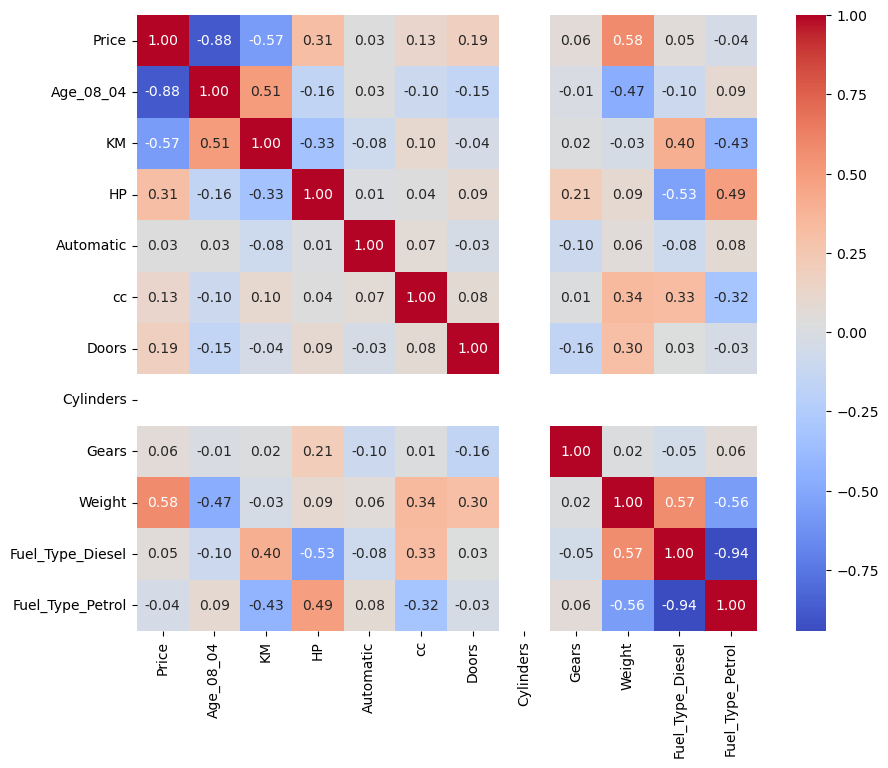

             Feature        VIF
0          Age_08_04   1.920520
1                 KM   2.001790
2                 HP   2.299766
3          Automatic   1.094550
4                 cc   1.223892
5              Doors   1.217898
6          Cylinders        NaN
7              Gears   1.117413
8             Weight   3.297145
9   Fuel_Type_Diesel  11.317251
10  Fuel_Type_Petrol   9.702194
Model 1 R^2 Score: 0.834888804061108
Model 1 MSE: 2203043.823143705
Model 2 R^2 Score: 0.8078114279853927
Model 2 MSE: 2564331.534563476
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        02:12:50   Log-Likelihood:                -9863.2
No. O

D:\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Load dataset
df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\ToyotaCorolla - MLR.csv")

# Display first few rows
display(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Convert categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
fuel_encoded = encoder.fit_transform(df[['Fuel_Type']])  # Updated column name
fuel_df = pd.DataFrame(fuel_encoded, columns=encoder.get_feature_names_out(['Fuel_Type']))  # Updated column name

df = pd.concat([df, fuel_df], axis=1)
df.drop(columns=['Fuel_Type'], inplace=True)  # Updated column name

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Define independent and dependent variables
X = df.drop(columns=['Price'])
y = df['Price']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Check for NaN values and handle them
X_scaled.fillna(X_scaled.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Check VIF for multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif_data)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print("Model 1 R^2 Score:", r2_score(y_test, y_pred1))
print("Model 1 MSE:", mean_squared_error(y_test, y_pred1))

# Model 2: Removing high VIF features
X_train_vif = X_train.drop(columns=['KM'])  # Example removal of high VIF feature
X_test_vif = X_test.drop(columns=['KM'])
model2 = LinearRegression()
model2.fit(X_train_vif, y_train)
y_pred2 = model2.predict(X_test_vif)
print("Model 2 R^2 Score:", r2_score(y_test, y_pred2))
print("Model 2 MSE:", mean_squared_error(y_test, y_pred2))

# Model 3: Using only statistically significant features
X_train_sm = sm.add_constant(X_train)  # Add intercept
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Selecting significant features (p-value < 0.05 assumed as threshold)
significant_features = model_sm.pvalues[model_sm.pvalues < 0.05].index.drop('const')
X_train_sig = X_train[significant_features]
X_test_sig = X_test[significant_features]
model3 = LinearRegression()
model3.fit(X_train_sig, y_train)
y_pred3 = model3.predict(X_test_sig)
print("Model 3 R^2 Score:", r2_score(y_test, y_pred3))
print("Model 3 MSE:", mean_squared_error(y_test, y_pred3))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso R^2 Score:", r2_score(y_test, y_pred_lasso))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
ridge = Ridge(alpha=1.0, solver='lsqr')  # Fixing solver issue
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge R^2 Score:", r2_score(y_test, y_pred_ridge))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
